# Raw Data Cleaning
We set up a new Jupyter Notebook to backup the data as `rawdata` to avoid bugs and mistakes happening.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
rawdata = pd.read_csv('merged_dataframe.csv')
rawdata = rawdata.sort_values(by='Year', ascending=True)
rawdata['Entity'] = 'China'
rawdata['Code'] = 'CHN'

cols = rawdata.columns.tolist()
col_to_drop = cols[20] 
rawdata = rawdata.drop(columns=[col_to_drop])

cols = rawdata.columns.tolist()
cols.insert(3, cols.pop(6))
cols.insert(4, cols.pop(7))

rawdata = rawdata[cols]
rawdata = rawdata.reset_index(drop=True)


Consistent Scale

In [5]:
columns_to_convert = [
    'Foreign Direct Investment', 
    'Unemployment rate', 
    'Government health expenditure', 
    'Government revenues', 
    'Age dependency ratio', 
    'Research and development spending'
]
for column in columns_to_convert:
    if column in rawdata.columns:
        rawdata[column] = rawdata[column].apply(lambda x: x * 100 if pd.notnull(x) else x)

rawdata.to_csv('Raw_data.csv', index=False)

rawdata

,Entity,Code,Year,GDP per Capita,Population,"Government expenditure on education, total (% of GDP)",Government expenditure on primary education as % of GDP (%),Annual Working Hours,Consumer Price Index,Government Expenditure,...,Government health expenditure,Life Expectancy,Government revenues,Age dependency ratio,Research and development spending,Taxes on goods and services (as a share of GDP),"Taxes on income, profits and capital gains (TIPCG) (as a share of GDP)",Human Development Index,Gender Development Index,Productivity
0,China,CHN,1970,1292.5070,8.225345e+08,NaN,NaN,1976.3120,NaN,NaN,...,NaN,NaN,NaN,80.132945,NaN,NaN,NaN,NaN,NaN,1. 4994909
1,China,CHN,1971,1382.5481,8.432854e+08,1.388740,NaN,1975.7937,NaN,NaN,...,NaN,57.472110,NaN,79.802335,NaN,NaN,NaN,NaN,NaN,1.5798508
2,China,CHN,1972,1310.6804,8.628404e+08,1.604760,NaN,1975.5077,NaN,NaN,...,NaN,58.388600,NaN,78.953924,NaN,NaN,NaN,NaN,NaN,1. 492279
3,China,CHN,1973,1396.8113,8.816521e+08,1.650820,NaN,1975.3647,NaN,NaN,...,NaN,59.367887,NaN,78.661213,NaN,NaN,NaN,NaN,NaN,1. 5905421
4,China,CHN,1974,1392.1698,8.993677e+08,1.761150,NaN,1975.1897,NaN,NaN,...,NaN,60.144828,NaN,78.936067,NaN,NaN,NaN,NaN,NaN,1. 5722494
5,China,CHN,1975,1428.9760,9.151247e+08,1.708500,NaN,1974.8975,NaN,NaN,...,NaN,60.702793,NaN,79.252391,NaN,NaN,NaN,NaN,NaN,1. 5965048
6,China,CHN,1976,1350.1012,9.293759e+08,1.816570,NaN,1974.2075,NaN,NaN,...,NaN,61.613119,NaN,79.236954,NaN,NaN,NaN,NaN,NaN,1. 4927917
7,China,CHN,1977,1424.0562,9.425813e+08,1.749540,NaN,1973.4353,NaN,NaN,...,NaN,62.365282,NaN,77.057473,NaN,NaN,NaN,NaN,NaN,1. 5616083
8,China,CHN,1978,1618.6330,9.551389e+08,1.958840,NaN,1972.7274,NaN,NaN,...,NaN,62.818361,NaN,73.129774,NaN,NaN,NaN,NaN,NaN,1. 7562629
9,China,CHN,1979,1677.2329,9.682989e+08,2.148050,NaN,1972.1038,NaN,NaN,...,NaN,63.483663,NaN,70.219607,NaN,NaN,NaN,NaN,NaN,1. 7937474


# Data Quality KPIs Test
After data collection, we get the raw data, which still needs to be cleaned. To test data quality, we use several KPIs to develop the data quality.


## Test DataFrame

In [6]:
import requests

def fetch_indicator(country_code, indicator, date_range):
    # Build the URL for the API request
    url = f'https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}?date={date_range}&format=json&per_page=500'
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if data and len(data) > 1:
            return pd.DataFrame([
                {
                    'Year': item['date'],
                    indicator: item['value']
                }
                for item in data[1]
            ])
        else:
            print(f"No data found for {indicator}.")
            return pd.DataFrame()
    else:
        print(f"Failed to retrieve data for {indicator}.")
        return pd.DataFrame()


In [7]:
country_code = 'CN'
date_range = '1970:2021'
indicators = {
    'NY.GDP.PCAP.CD': 'GDP per Capita',
    'SP.POP.TOTL': 'Population',
    'SE.XPD.TOTL.GD.ZS': 'Government expenditure on education, total (% of GDP)',
    'UIS.XGDP.1.FSGOV': 'Government expenditure on primary education as % of GDP (%)',
    'FP.CPI.TOTL': 'Consumer Price Index',
    'GB.XPD.RSDV.GD.ZS': 'Research And Development Expenditure (% Of GDP)'
}

In [8]:
frames = [fetch_indicator(country_code, indicator, date_range).rename(columns={indicator: name})
          for indicator, name in indicators.items()]

testdata = pd.concat(frames, axis=1)
testdata = testdata.loc[:,~testdata.columns.duplicated()]  # Remove duplicate columns, if any
testdata = testdata.sort_values(by='Year', ascending=True)  # Sort by Year

testdata.dropna(how='all', subset=indicators.values(), inplace=True)

testdata = testdata.reset_index(drop=True)
# testdata.to_csv('Test_data.csv', index=False)


In [9]:
extra_test_new = pd.read_csv('extra_test.csv')
testdata_new = testdata
extra_test_new['Year'] = extra_test_new['Year'].astype('int64')
testdata_new['Year'] = testdata_new['Year'].astype('int64')
merged_data = pd.merge(testdata_new, extra_test_new, on='Year', how='outer', suffixes=('', '_extra'))

for col in extra_test_new.columns:
    if '_extra' in col:
        original_col_name = col.replace('_extra', '')
        merged_data[original_col_name] = merged_data.apply(lambda row: row[col] if pd.notna(row[col]) else row[original_col_name], axis=1)

merged_data_final = merged_data.drop(columns=[col for col in merged_data.columns if '_extra' in col])
testdata = merged_data_final
testdata.to_csv('Test_data.csv', index=False)
testdata

,Year,GDP per Capita,Population,"Government expenditure on education, total (% of GDP)",Government expenditure on primary education as % of GDP (%),Consumer Price Index,Research And Development Expenditure (% Of GDP),Entity,Code,Annual Working Hours,Foreign Direct Investment,Unemployment rate,Government health expenditure,Life Expectancy,Government revenues,Age dependency ratio,Human Development Index,Gender Development Index
0,1970,113.162578,818315000,NaN,NaN,NaN,NaN,China,CHN,1976.3120,NaN,NaN,NaN,56.6070,NaN,80.52,NaN,NaN
1,1971,118.654144,841105000,1.388740,NaN,NaN,NaN,China,CHN,1975.7937,NaN,NaN,NaN,57.5653,NaN,80.19,NaN,NaN
2,1972,131.885559,862030000,1.604760,NaN,NaN,NaN,China,CHN,1975.5077,NaN,NaN,NaN,58.4184,NaN,79.48,NaN,NaN
3,1973,157.089111,881940000,1.650820,NaN,NaN,NaN,China,CHN,1975.3647,NaN,NaN,NaN,59.3891,NaN,78.83,NaN,NaN
4,1974,160.147688,900350000,1.761150,NaN,NaN,NaN,China,CHN,1975.1897,NaN,NaN,NaN,60.1683,NaN,79.06,NaN,NaN
5,1975,178.339614,916395000,1.708500,NaN,NaN,NaN,China,CHN,1974.8975,NaN,NaN,NaN,60.9170,NaN,79.51,NaN,NaN
6,1976,165.404262,930685000,1.816570,NaN,NaN,NaN,China,CHN,1974.2075,NaN,NaN,NaN,61.7956,NaN,79.76,NaN,NaN
7,1977,185.420537,943455000,1.749540,NaN,NaN,NaN,China,CHN,1973.4353,NaN,NaN,NaN,62.5379,NaN,78.43,NaN,NaN
8,1978,228.519313,956165000,1.958840,NaN,NaN,NaN,China,CHN,1972.7274,NaN,NaN,NaN,63.2177,NaN,74.77,NaN,NaN
9,1979,272.146923,969005000,2.148050,NaN,NaN,NaN,China,CHN,1972.1038,NaN,NaN,NaN,63.8649,NaN,71.06,NaN,NaN


In [11]:
testdata.isnull()

,Year,GDP per Capita,Population,"Government expenditure on education, total (% of GDP)",Government expenditure on primary education as % of GDP (%),Consumer Price Index,Research And Development Expenditure (% Of GDP),Entity,Code,Annual Working Hours,Foreign Direct Investment,Unemployment rate,Government health expenditure,Life Expectancy,Government revenues,Age dependency ratio,Human Development Index,Gender Development Index
0,False,False,False,True,True,True,True,False,False,False,True,True,True,False,True,False,True,True
1,False,False,False,False,True,True,True,False,False,False,True,True,True,False,True,False,True,True
2,False,False,False,False,True,True,True,False,False,False,True,True,True,False,True,False,True,True
3,False,False,False,False,True,True,True,False,False,False,True,True,True,False,True,False,True,True
4,False,False,False,False,True,True,True,False,False,False,True,True,True,False,True,False,True,True
5,False,False,False,False,True,True,True,False,False,False,True,True,True,False,True,False,True,True
6,False,False,False,False,True,True,True,False,False,False,True,True,True,False,True,False,True,True
7,False,False,False,False,True,True,True,False,False,False,True,True,True,False,True,False,True,True
8,False,False,False,False,True,True,True,False,False,False,True,True,True,False,True,False,True,True
9,False,False,False,False,True,True,True,False,False,False,True,True,True,False,True,False,True,True


In [12]:
testdata.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
dtype: bool

In [13]:
### Convert to numeric type
def convert_to_numeric(col):
    return pd.to_numeric(col, errors='coerce')
testdata = testdata.apply(convert_to_numeric)

In [15]:
def min_max_scaling_columns(df, start_col, end_col):
    for col in df.columns[start_col:end_col]:
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)
    return df

In [17]:
### Standardization
testdata1 = testdata.copy()
min_max_scaling_columns(testdata1, 2, -1)

,Year,GDP per Capita,Population,"Government expenditure on education, total (% of GDP)",Government expenditure on primary education as % of GDP (%),Consumer Price Index,Research And Development Expenditure (% Of GDP),Entity,Code,Annual Working Hours,Foreign Direct Investment,Unemployment rate,Government health expenditure,Life Expectancy,Government revenues,Age dependency ratio,Human Development Index,Gender Development Index
0,1970,113.162578,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.031043,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN
1,1971,118.654144,0.038364,0.000000,NaN,NaN,NaN,NaN,NaN,0.028719,NaN,NaN,NaN,0.044358,NaN,0.992400,NaN,NaN
2,1972,131.885559,0.073589,0.084536,NaN,NaN,NaN,NaN,NaN,0.027436,NaN,NaN,NaN,0.083847,NaN,0.976048,NaN,NaN
3,1973,157.089111,0.107105,0.102561,NaN,NaN,NaN,NaN,NaN,0.026794,NaN,NaN,NaN,0.128779,NaN,0.961078,NaN,NaN
4,1974,160.147688,0.138096,0.145737,NaN,NaN,NaN,NaN,NaN,0.026010,NaN,NaN,NaN,0.164847,NaN,0.966375,NaN,NaN
5,1975,178.339614,0.165105,0.125133,NaN,NaN,NaN,NaN,NaN,0.024699,NaN,NaN,NaN,0.199503,NaN,0.976739,NaN,NaN
6,1976,165.404262,0.189161,0.167425,NaN,NaN,NaN,NaN,NaN,0.021604,NaN,NaN,NaN,0.240172,NaN,0.982497,NaN,NaN
7,1977,185.420537,0.210657,0.141194,NaN,NaN,NaN,NaN,NaN,0.018141,NaN,NaN,NaN,0.274532,NaN,0.951865,NaN,NaN
8,1978,228.519313,0.232053,0.223100,NaN,NaN,NaN,NaN,NaN,0.014966,NaN,NaN,NaN,0.305999,NaN,0.867573,NaN,NaN
9,1979,272.146923,0.253668,0.297145,NaN,NaN,NaN,NaN,NaN,0.012169,NaN,NaN,NaN,0.335956,NaN,0.782128,NaN,NaN


In [ ]:
testdata1.drop(['Entity', 'Code'], axis=1, inplace=True)
testdata.drop(['Entity', 'Code'], axis=1, inplace=True)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


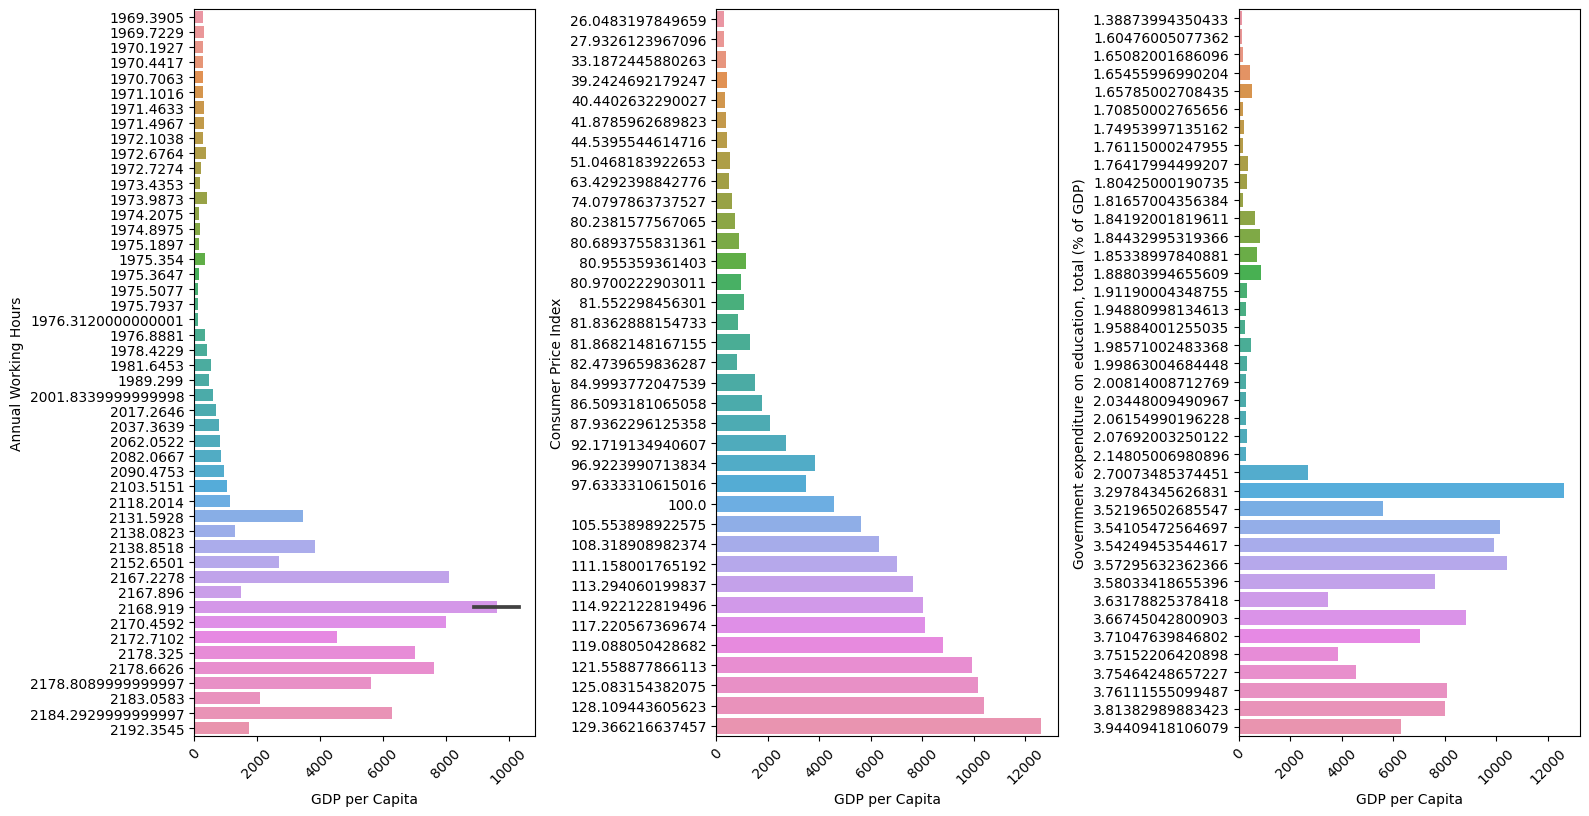

In [22]:
### some visualizations
fig, ax = plt.subplots(1, 3, figsize=(16, 8))

sns.barplot(
    x='GDP per Capita',
    y='Annual Working Hours',
    data=testdata,
    orient='h',
    ci='sd',
    ax=ax[0]
)

sns.barplot(
    x='GDP per Capita',
    y='Consumer Price Index',
    data=testdata,
    orient='h',
    ci='sd',
    ax=ax[1]
)

sns.barplot(
    x='GDP per Capita',
    y='Government expenditure on education, total (% of GDP)',
    data=testdata,
    orient='h',
    ci='sd',
    ax=ax[2]
)

fig.tight_layout()

for a in ax:
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 

The `ci` parameter is de

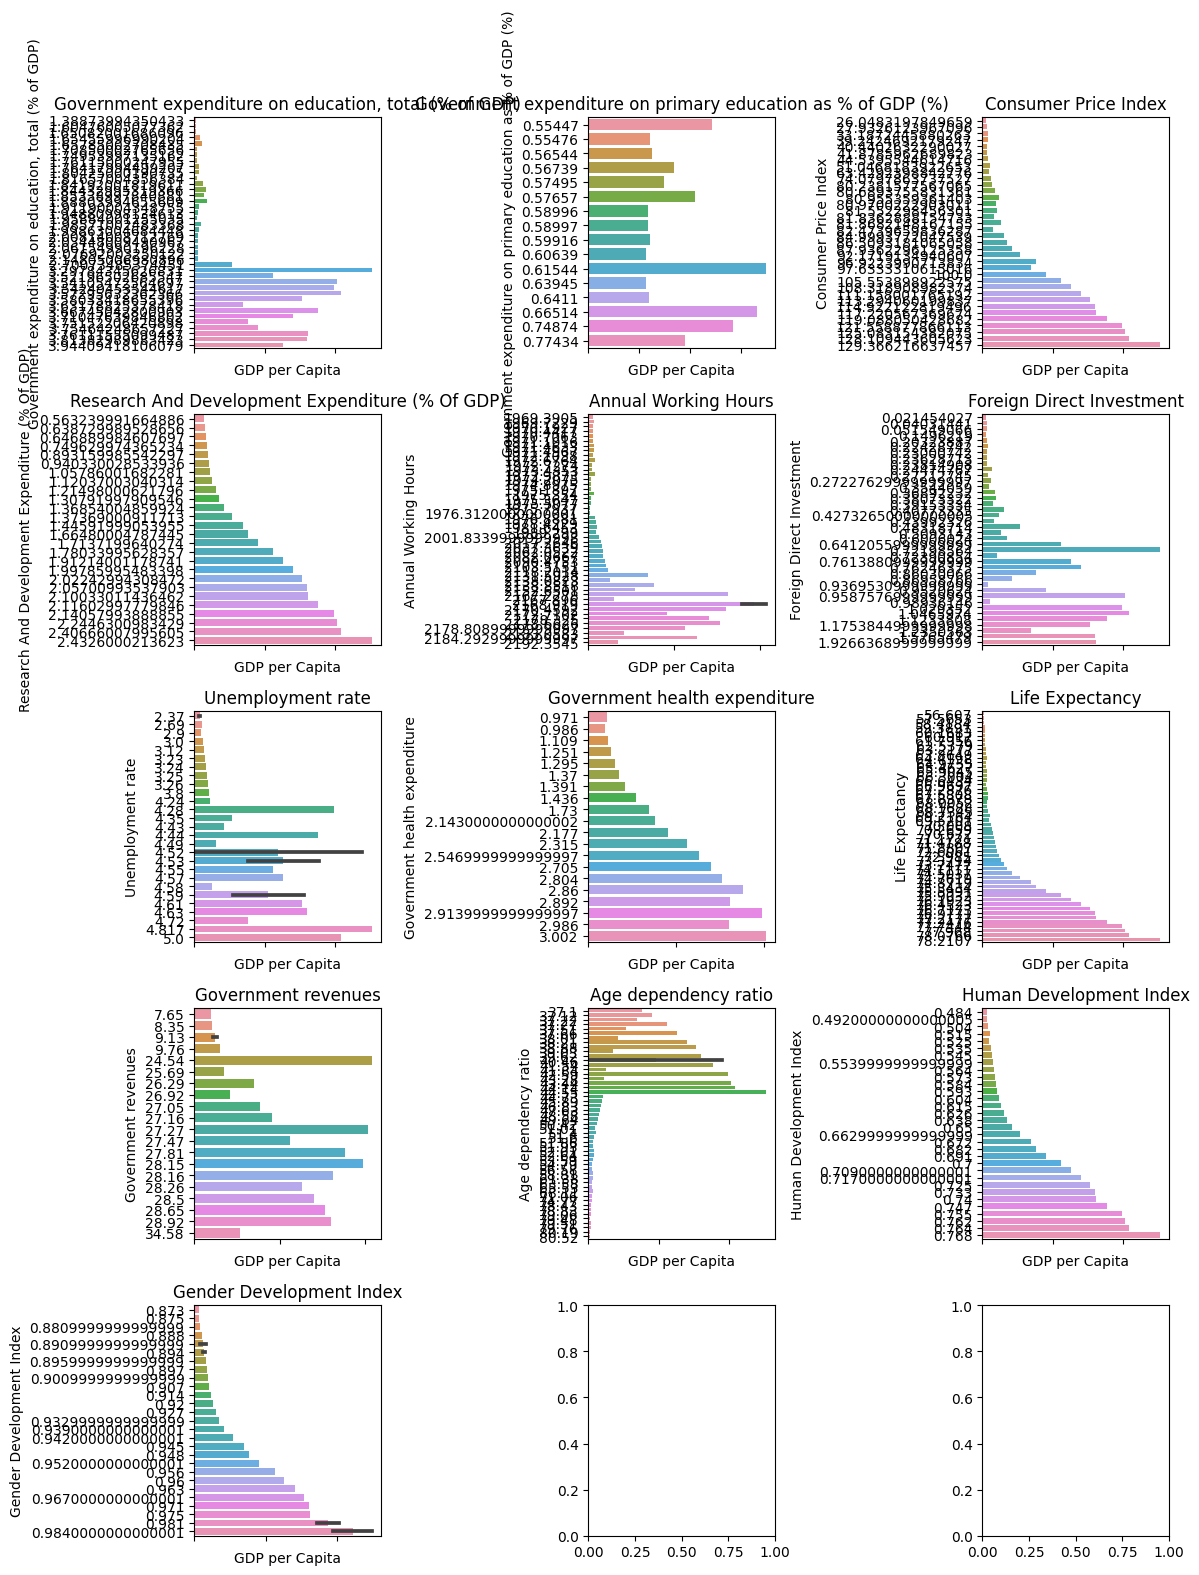

In [40]:
### some visualization
fig, ax = plt.subplots(5, 3, figsize=(12, 15))
ax_flat = ax.flatten()

for i, column in enumerate(testdata.columns[3:]):
    
    sns.barplot(
        x='GDP per Capita',
        y=column,
        data=testdata,
        orient='h',
        ci='sd',
        ax=ax_flat[i]
    )

    ax_flat[i].set_xticklabels(ax_flat[i].get_xticklabels(), rotation=45)
    ax_flat[i].set_title(column)

plt.tight_layout()
plt.show()

In [33]:
testdata

,Year,GDP per Capita,Population,"Government expenditure on education, total (% of GDP)",Government expenditure on primary education as % of GDP (%),Consumer Price Index,Research And Development Expenditure (% Of GDP),Annual Working Hours,Foreign Direct Investment,Unemployment rate,Government health expenditure,Life Expectancy,Government revenues,Age dependency ratio,Human Development Index,Gender Development Index
0,1970,113.162578,818315000,NaN,NaN,NaN,NaN,1976.3120,NaN,NaN,NaN,56.6070,NaN,80.52,NaN,NaN
1,1971,118.654144,841105000,1.388740,NaN,NaN,NaN,1975.7937,NaN,NaN,NaN,57.5653,NaN,80.19,NaN,NaN
2,1972,131.885559,862030000,1.604760,NaN,NaN,NaN,1975.5077,NaN,NaN,NaN,58.4184,NaN,79.48,NaN,NaN
3,1973,157.089111,881940000,1.650820,NaN,NaN,NaN,1975.3647,NaN,NaN,NaN,59.3891,NaN,78.83,NaN,NaN
4,1974,160.147688,900350000,1.761150,NaN,NaN,NaN,1975.1897,NaN,NaN,NaN,60.1683,NaN,79.06,NaN,NaN
5,1975,178.339614,916395000,1.708500,NaN,NaN,NaN,1974.8975,NaN,NaN,NaN,60.9170,NaN,79.51,NaN,NaN
6,1976,165.404262,930685000,1.816570,NaN,NaN,NaN,1974.2075,NaN,NaN,NaN,61.7956,NaN,79.76,NaN,NaN
7,1977,185.420537,943455000,1.749540,NaN,NaN,NaN,1973.4353,NaN,NaN,NaN,62.5379,NaN,78.43,NaN,NaN
8,1978,228.519313,956165000,1.958840,NaN,NaN,NaN,1972.7274,NaN,NaN,NaN,63.2177,NaN,74.77,NaN,NaN
9,1979,272.146923,969005000,2.148050,NaN,NaN,NaN,1972.1038,NaN,NaN,NaN,63.8649,NaN,71.06,NaN,NaN


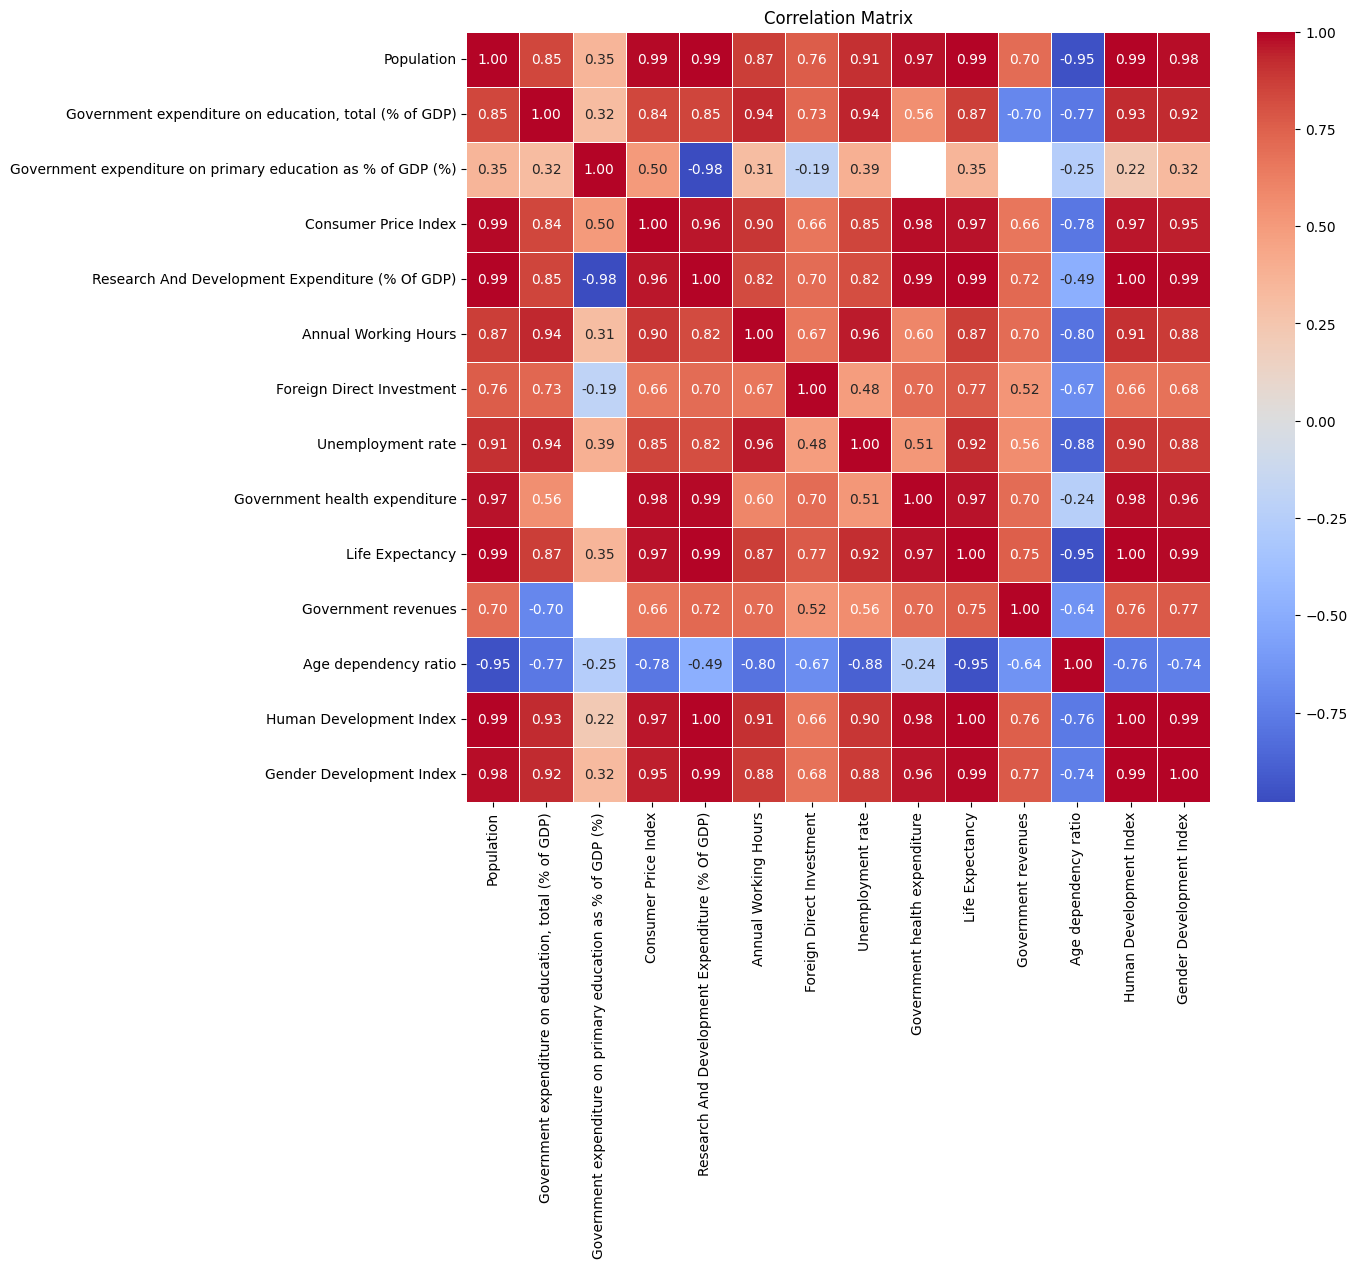

In [25]:
### corr analysis
correlation_matrix = testdata1.drop(columns=['Year','GDP per Capita']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Consistency
Some data like `GDP per Capita` and `Population`... had the official data to compute matched data.

In [ ]:
def calculate_consistency(rawdata, testdata):
    consistency_results = {column: 100 for column in rawdata.columns}
    for column in rawdata.columns.intersection(testdata.columns):
        merged_data = pd.merge(rawdata[[column]], testdata[[column]], left_index=True, right_index=True, how='outer', suffixes=('_raw', '_test'))
        matches = merged_data.apply(lambda x: x[column + '_raw'] == x[column + '_test'] if pd.notna(x[column + '_raw']) or pd.notna(x[column + '_test']) else True, axis=1)
        consistency_percentage = (matches.sum() / len(merged_data)) * 100
        consistency_results[column] = consistency_percentage

    consistency_df = pd.DataFrame(list(consistency_results.items()), columns=['Column', 'Consistency'])
    average_consistency = consistency_df['Consistency'].sum() / len(consistency_results)
    consistency_df['Consistency'] = consistency_df['Consistency'].apply(lambda x: f"{x:.2f}%")
    return consistency_df, average_consistency

consistency_df, average_consistency = calculate_consistency(rawdata, testdata)

print(consistency_df)
print(f"Average Consistency: {average_consistency:.2f}%")

## Reliability

In [ ]:
def calculate_reliability(rawdata, testdata):
    reliability_results = {column: 100 for column in rawdata.columns}
    for column in rawdata.columns.intersection(testdata.columns):
        merged_data = pd.merge(rawdata[[column]], testdata[[column]], left_index=True, right_index=True, how='outer', suffixes=('_raw', '_test'))
        merged_data[column + '_raw'] = pd.to_numeric(merged_data[column + '_raw'], errors='coerce')
        merged_data[column + '_test'] = pd.to_numeric(merged_data[column + '_test'], errors='coerce')
        percentage_differences = merged_data.apply(lambda x: abs(x[column + '_raw'] - x[column + '_test']) / x[column + '_test'] * 100 if pd.notna(x[column + '_raw']) and pd.notna(x[column + '_test']) else None, axis=1)
        reliability_percentage = 100 - percentage_differences.mean()
        reliability_results[column] = reliability_percentage if pd.notna(reliability_percentage) else 100

    reliability_df = pd.DataFrame(list(reliability_results.items()), columns=['Column', 'Reliability'])
    average_reliability = reliability_df['Reliability'].mean()
    reliability_df['Reliability'] = reliability_df['Reliability'].apply(lambda x: f"{x:.2f}%" if pd.notna(x) else 'NA')
    return reliability_df, average_reliability

reliability_df, average_reliability = calculate_reliability(rawdata, testdata)

# Print the results
print(reliability_df)
print(f"Average Reliability: {average_reliability:.2f}%")

## Completeness

In [ ]:
def calculate_completeness(data):
    completeness_per_column = {}
    for column in data.columns:
        non_na_count = data[column].notna().sum()
        total_count = data[column].shape[0]
        completeness = (non_na_count / total_count) * 100
        completeness_per_column[column] = completeness

    completeness_df = pd.DataFrame(list(completeness_per_column.items()), columns=['Column', 'Completeness (%)'])
    
    total_non_na_count = data.notna().sum().sum()
    total_values = data.shape[0] * data.shape[1]
    overall_completeness = (total_non_na_count / total_values) * 100

    return completeness_df, overall_completeness
completeness_df, overall_completeness = calculate_completeness(rawdata)

# Print the results
print(completeness_df)
print(f"Overall Completeness: {overall_completeness:.2f}%")

## KPIs of Raw Data

In [ ]:
consistency_df, average_consistency = calculate_consistency(rawdata, testdata)
reliability_df, average_reliability = calculate_reliability(rawdata, testdata)
completeness_df, overall_completeness = calculate_completeness(rawdata)

# Merge the results into a single DataFrame
combined_kpis_df = consistency_df.merge(reliability_df, on='Column', how='outer').merge(completeness_df, on='Column', how='outer')

# Optionally, fill missing values if any exist after merging
combined_kpis_df.fillna('N/A', inplace=True)

# Print the combined KPIs DataFrame
print(f"Average Consistency: {average_consistency:.2f}%")
print(f"Average Reliability: {average_reliability:.2f}%")
print(f"Overall Completeness: {overall_completeness:.2f}%")
combined_kpis_df

# Develop Data Quality
Choose most important problem data `GDP per Capita` and `Population` to improve

In [ ]:
newdata = rawdata

columns_to_replace = ['GDP per Capita', 'Population']
for column in columns_to_replace:
    if column in newdata.columns and column in testdata.columns:
        newdata[column] = testdata[column]
newdata.to_csv('New_data.csv', index=False)
newdata

## Re-compute KPIs

In [ ]:
consistency_df, average_consistency = calculate_consistency(newdata, testdata)
reliability_df, average_reliability = calculate_reliability(newdata, testdata)
completeness_df, overall_completeness = calculate_completeness(newdata)

# Merge the results into a single DataFrame
combined_kpis_df = consistency_df.merge(reliability_df, on='Column', how='outer').merge(completeness_df, on='Column', how='outer')

# Optionally, fill missing values if any exist after merging
combined_kpis_df.fillna('N/A', inplace=True)

# Print the combined KPIs DataFrame
print(f"Average Consistency: {average_consistency:.2f}%")
print(f"Average Reliability: {average_reliability:.2f}%")
print(f"Overall Completeness: {overall_completeness:.2f}%")
combined_kpis_df

**The indicators for measuring data quality have all increased**